In [53]:
#importing respective lib
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import seaborn as sns

In [5]:
#Randomly pick four Tech giant companies and reading all datas
data=pd.read_csv('GOOG_data.csv')
data1=pd.read_csv('MSFT_data.csv')
data2=pd.read_csv('AAPL_data.csv')
data3=pd.read_csv('AMZN_data.csv')

In [7]:
#making it as a single source of data
company_list=[data,data1,data2,data3]
all_data=pd.DataFrame()
for file in company_list:
    all_data=pd.concat([all_data,file],ignore_index=True)

In [8]:
#making tech_list array for future reference
tech_list=all_data['Name'].unique()
tech_list

array(['GOOG', 'MSFT', 'AAPL', 'AMZN'], dtype=object)

In [9]:
#converting object format to datetime format
all_data['date']=pd.to_datetime(all_data['date'])
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

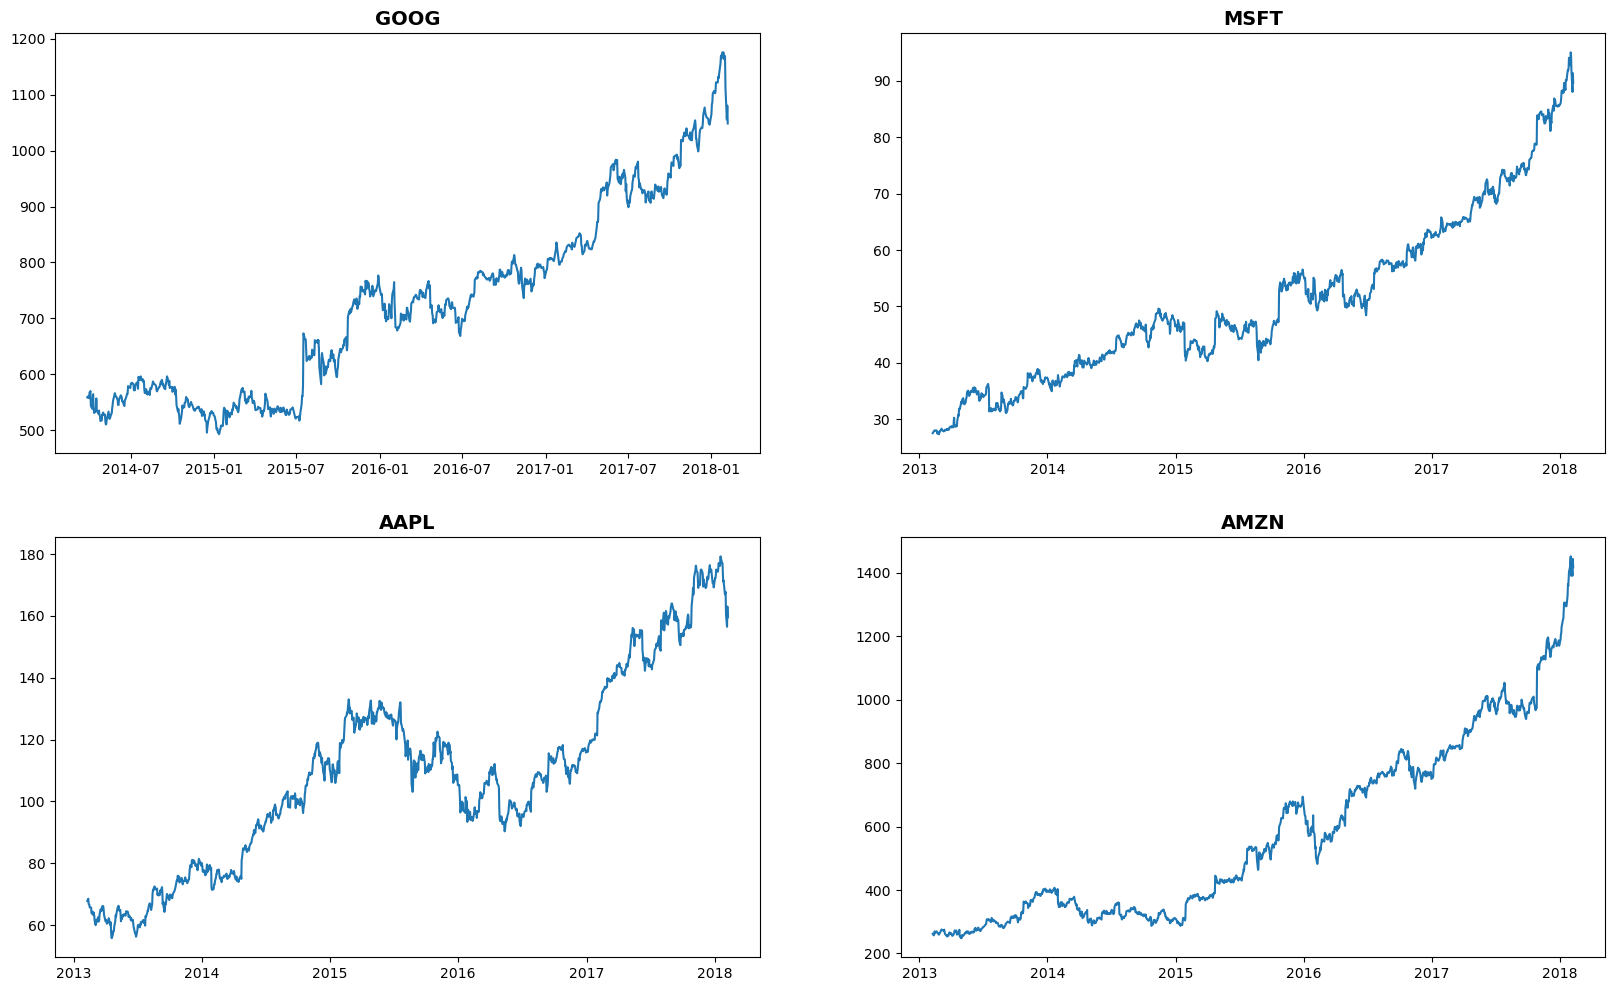

In [49]:
#Shows all company's close value data
plt.figure(figsize=(20,12))
for index,company in enumerate(tech_list,1):
    plt.subplot(2,2,index) 
    filter1=all_data['Name']==company 
    df=all_data[filter1]
    plt.plot(df['date'],df['close'])
    plt.title(company,fontsize=14,fontweight="bold")

In [23]:
#making window timings
wt=[10,20,50,100]
new_data=all_data.copy()
new_data.set_index('date',inplace=True)

In [24]:
#Using window rolling function for analysis data on  specific time intervals
for index in wt:
    new_data['window_'+str(index)]=new_data['close'].rolling(window=index).mean()    

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'window_10',
       'window_20', 'window_50', 'window_100'],
      dtype='object')

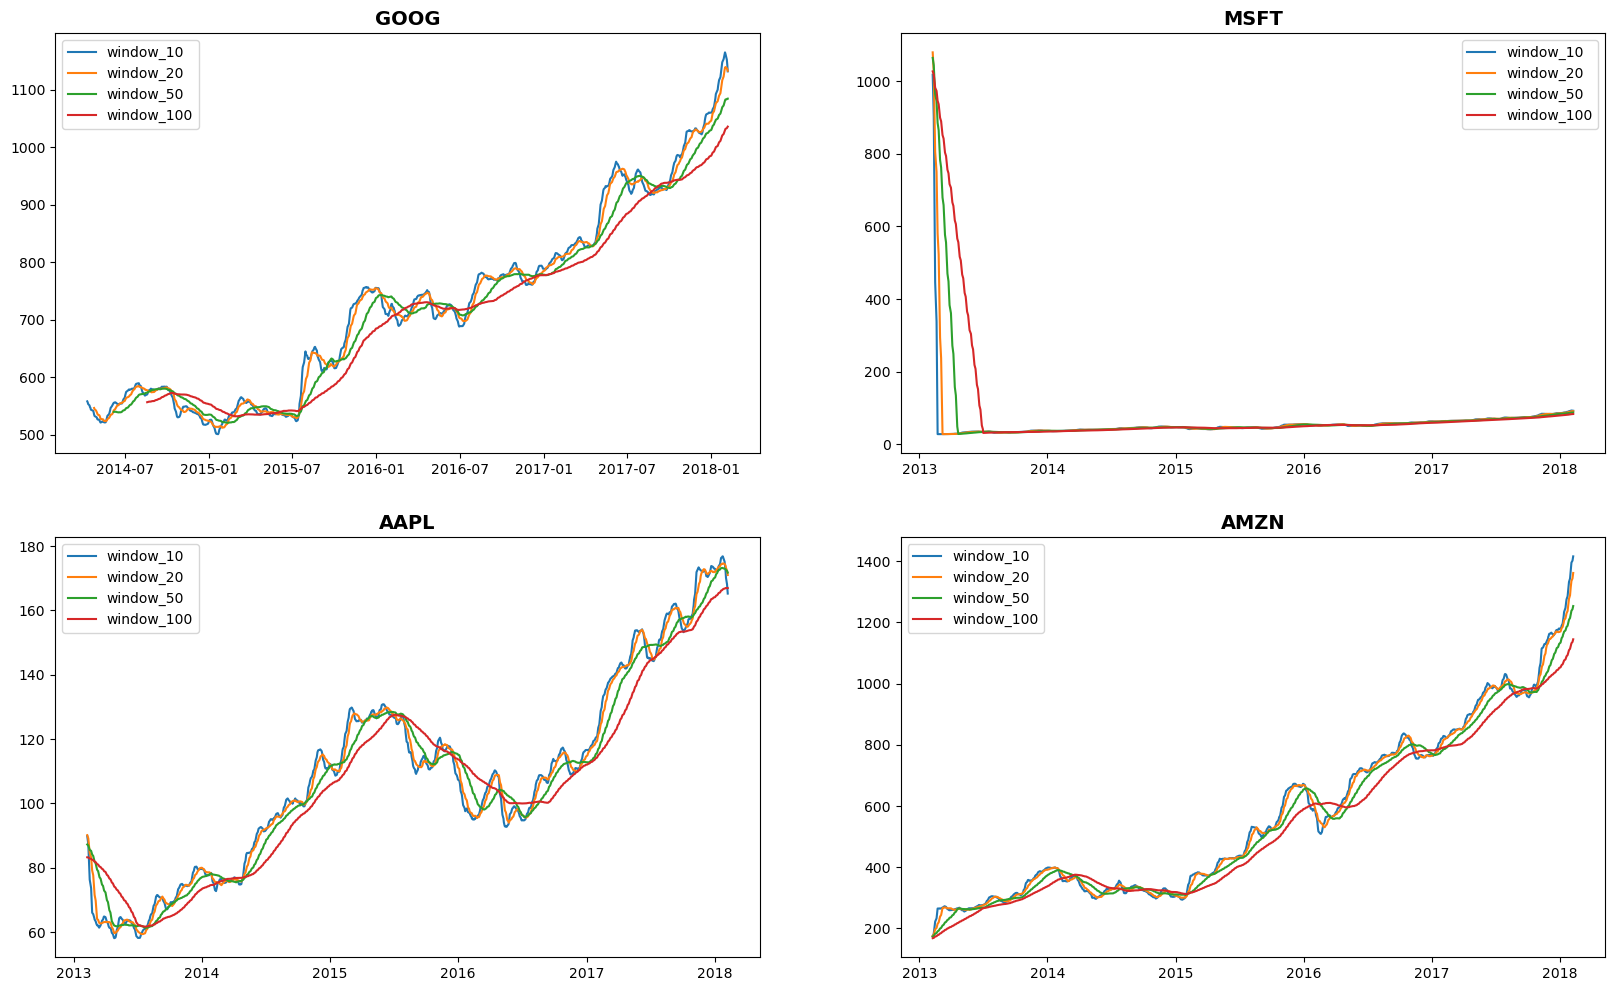

In [50]:
#Result
plt.figure(figsize=(20,12))
for index,company in enumerate(tech_list,1):
    plt.subplot(2,2,index) 
    filter1=new_data['Name']==company 
    df=new_data[filter1]
    plt.plot(df[['window_10',
       'window_20', 'window_50', 'window_100']])
    plt.legend(['window_10',
       'window_20', 'window_50', 'window_100'])
    plt.title(company,fontsize=14,fontweight="bold")

In [45]:
#converting datetime to index
Google=pd.read_csv("GOOG_data.csv")
Google.index = pd.to_datetime(Google.index)
Google

,open,high,low,close,volume,Name
date,,,,,,
2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG
...,...,...,...,...,...,...
2018-02-01,1162.610,1174.00,1157.52,1167.70,2412114,GOOG
2018-02-02,1122.000,1123.07,1107.28,1111.90,4857943,GOOG
2018-02-05,1090.600,1110.00,1052.03,1055.80,3798301,GOOG


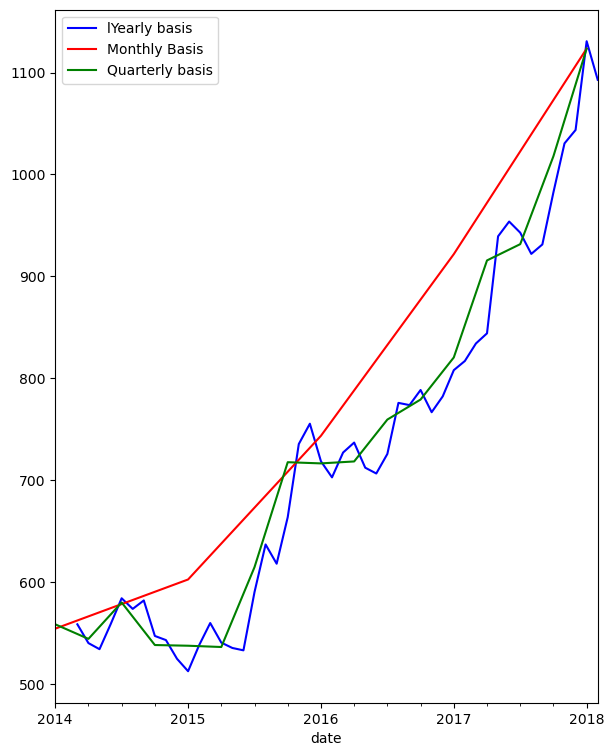

In [47]:
#Resampling analysis
plt.figure(figsize=(7,9))
Google['close'].resample('M').mean().plot(color='blue')
Google['close'].resample('Y').mean().plot(color='red')
Google['close'].resample('Q').mean().plot(color='green')
plt.legend(['lYearly basis','Monthly Basis','Quarterly basis'])
plt.show()

C:\Users\sanka\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


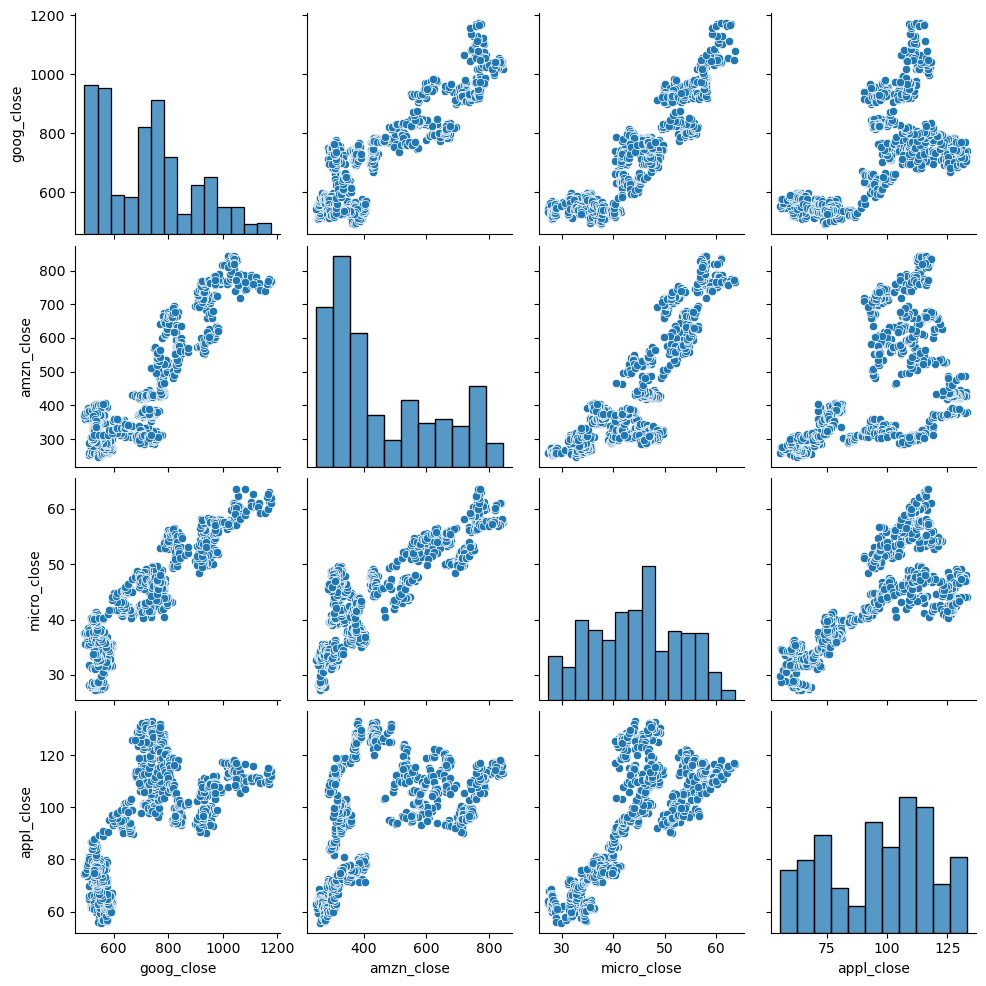

In [71]:
#co-relation analysis by pairplot 
google=pd.read_csv('GOOG_data.csv')
microsoft=pd.read_csv('MSFT_data.csv')
apple=pd.read_csv('AAPL_data.csv')
amazon=pd.read_csv('AMZN_data.csv')
closing_dfs = pd.DataFrame()
closing_dfs['goog_close']=google['close']
closing_dfs['amzn_close']=amazon['close']
closing_dfs['micro_close']=microsoft['close']
closing_dfs['appl_close']=apple['close']
sns.pairplot(closing_dfs)






<Axes: >

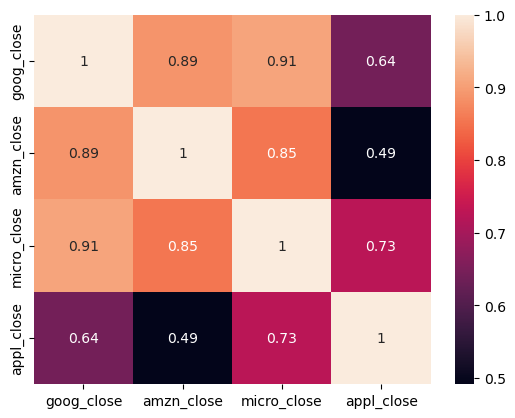

In [72]:
#heatmap analysis
sns.heatmap(closing_dfs.corr(),annot=True)

In [81]:
#percentage change for pair gird analysis
closing_pct_change = pd.DataFrame()
for col in closing_dfs:
    closing_pct_change[col+'_pct_change']=closing_dfs[col].pct_change()*100  
closing_pct_change

    

,goog_close_pct_change,amzn_close_pct_change,micro_close_pct_change,appl_close_pct_change
0,NaN,NaN,NaN,NaN
1,0.273968,-1.809506,1.125227,1.042235
2,-0.539295,0.579293,0.071788,-2.506658
3,1.829542,4.163123,0.538020,-0.190297
4,-0.028211,-0.085353,0.035676,-0.089934
...,...,...,...,...
970,-0.191463,-0.712865,-0.476342,0.000000
971,-4.778625,-1.017143,-0.159541,0.546922
972,-5.045418,-0.424442,-0.447427,0.129511
973,2.348930,1.086082,2.118780,0.577736


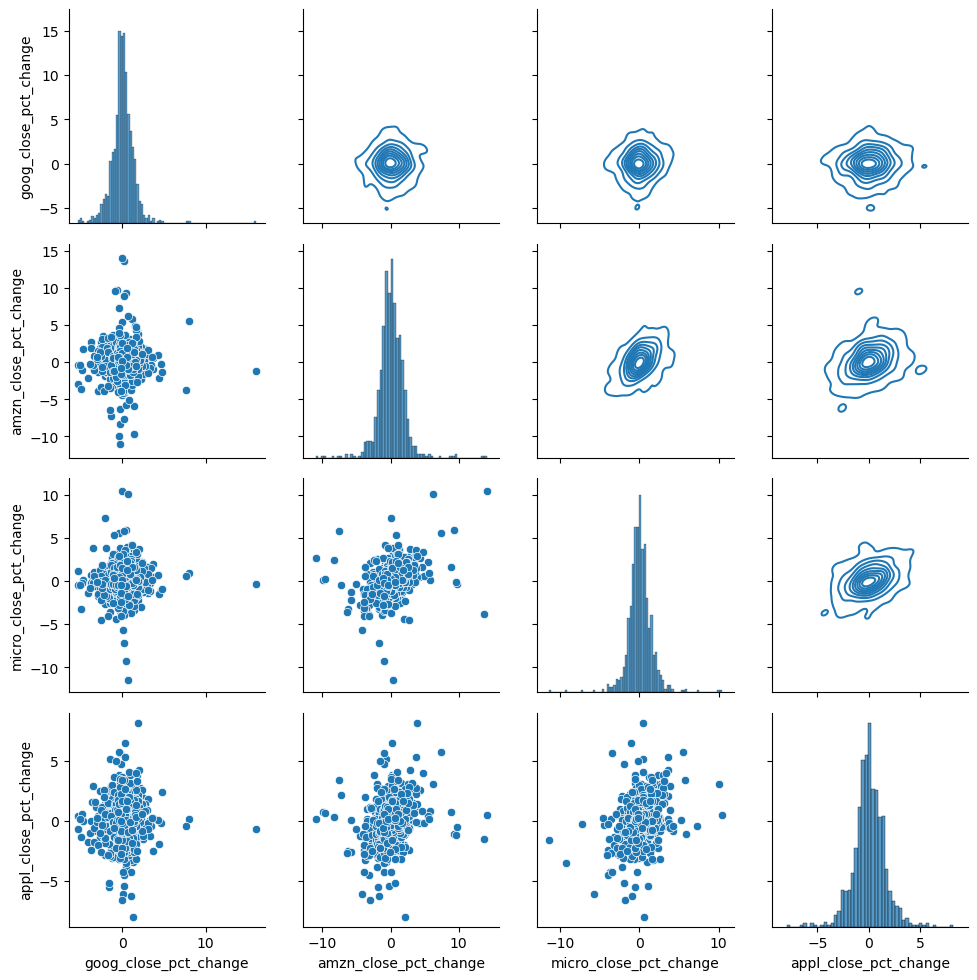

In [90]:
#PairGrid with the combination of scatter plot ,histogram and kde(Kernel density estimation) plot
g=sns.PairGrid(data=closing_pct_change)
g.map_diag(sns.histplot) 
g.map_lower(sns.scatterplot) 
g.map_upper(sns.kdeplot)